# COMP7015: Artificial Intelligence *(Semester 1, 2023/24)*

# Assignment 3 Sample Solutions

**Instructions:**
1. Assignment 3 contains one written problem and one programming problem.
2. For the written problem, similar to the assignment 1, put your answer into one single pdf file. For the programming problem, write all you codes in this jupyter notebook.
3. For submission, please compress your pdf file and .pynb file into a zip file without password. After submission, please download the submitted file and make sure it can be decompressed.
4. Fill in your name and student id in the following cell.
5. You can define your own functions, methods, classes, and variables as you need.
6. Please name your functions and variables in a clear and concise way to maximize the readability of your codes.
7. What you write in this notebook must be your own input. Copying from others and online resources are subject to heavy penalty. Lending and borrowing assignment solutions are both regarded as dishonest behaviors and are subject to heavy penalty and disciplinary actions.
8. You can use the lab materials as a reference but you should not directly copy codes from there. Instead, understand the lab materials fully and implement them on your own for this assignment.

In [ ]:
# Fill in your name and student ID
name = ''
student_id = ''


# Q1 (Written Problem). Learning a Neural Network (40 marks)

**Put your answers in a pdf file**

Given a neural network with the following architecture.
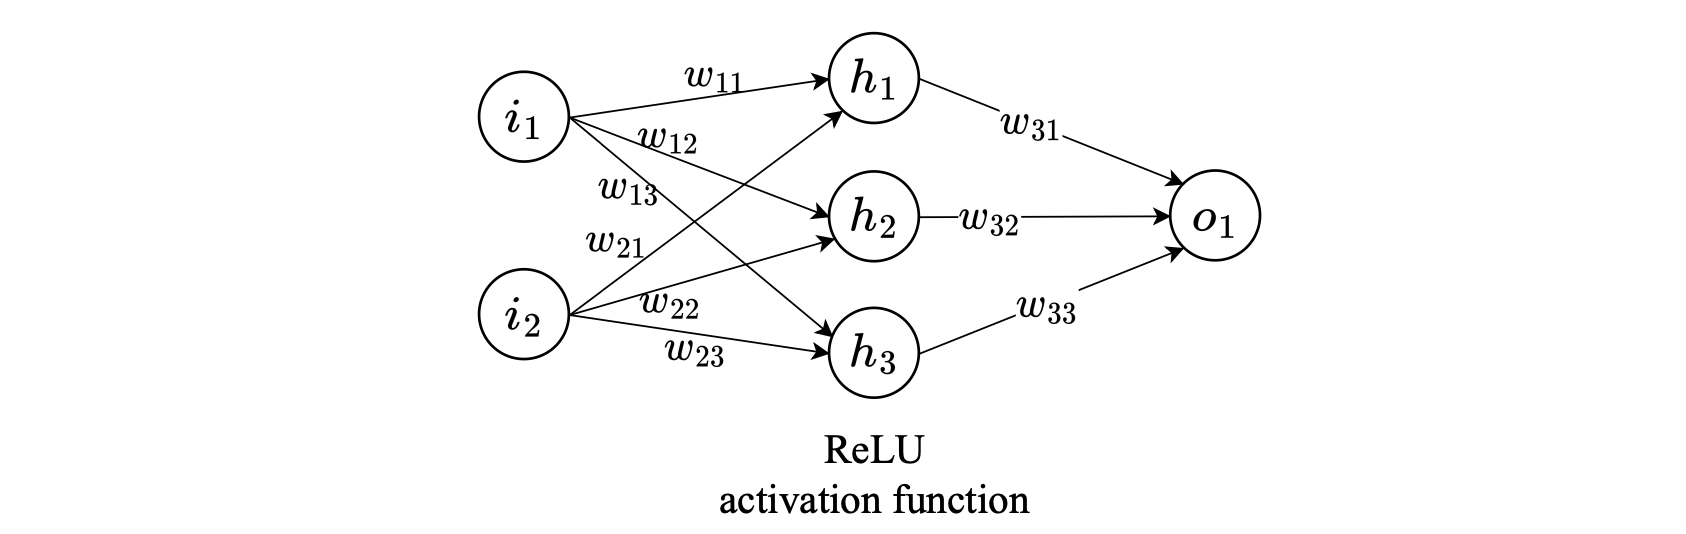

The values of the model parameters are as below.
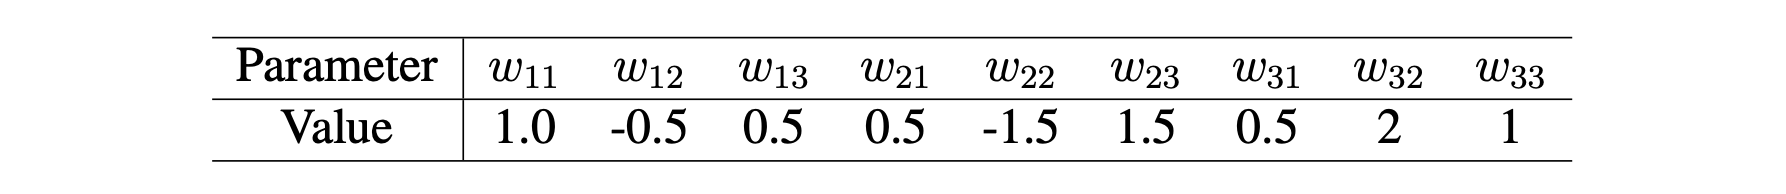

(1) Construct the computational graph for this neural network. Use MSE as the loss function. For simplicity, you can use $(i_1, i_2)$ as a vector.

(2) Given the input $(i_1=2, i_2=-1)$ and its corresponding label $1.5$, compute the MSE loss function using the computational graph.

(3) Compute the gradient with respect to all model parameters using the computational graph.

(4) Perform one step of stochastic gradient descent to update the model parameters and give the values of the model parameters after update. Use learning rate of 0.01 and weight decay of 0.001.

(1) Let $\mathbf{i}=(i_1, i_2)$, $\mathbf{w}_1=(w_{11}, w_{21})$, $\mathbf{w}_2=(w_{12}, w_{22})$, and $\mathbf{w}_3=(w_{13}, w_{23})$. The computational graph can be constructed as follows.

<img src="./computational_graph.png" width=60%/>

(2) The MSE loss is computed as: $$h_1 = \max\{w_{11}i_1+w_{21}i_2, 0\}=1.5\\
        h_2 = \max\{w_{12}i_1+w_{22}i_2, 0\}=0.5\\
        h_3 = \max\{w_{13}i_1+w_{23}i_2, 0\}=0\\
        o_1 = w_{31}h_1+w_{32}h_2+w_{33}h_3 = 1.75\\
        \text{residual} = y-o_1 = 1.5-1.75 = -0.25\\
        L_{\text{MSE}} = (1.5-1.75)^2=0.0625$$
        
(3) The model parameters to be updated are $\mathbf{w}_1$, $\mathbf{w}_2$, $\mathbf{w}_3$, $w_{31}$, $w_{32}$ and $w_{33}$. The gradients are given by:
$$\frac{\partial L}{\partial w_{31}} = 2\cdot\text{residual}\cdot-1\cdot h_1=2\times -0.25\times -1 \times 1.5=0.75$$
$$\frac{\partial L}{\partial w_{32}} = 2\cdot\text{residual}\cdot-1\cdot h_2=2\times -0.25\times -1 \times 0.5=0.25$$
$$\frac{\partial L}{\partial w_{33}} = 2\cdot\text{residual}\cdot-1\cdot h_3=2\times -0.25\times -1 \times 0=0$$
$$\frac{\partial L}{\partial \mathbf{w}_{1}} = 2\cdot\text{residual}\cdot-1\cdot w_{31}\cdot\mathbb{1}[\mathbf{w}_1^\top\mathbf{i}>0]\cdot\mathbf{i}=(0.5, -0.25)$$
$$\frac{\partial L}{\partial \mathbf{w}_{2}} = 2\cdot\text{residual}\cdot-1\cdot w_{32}\cdot\mathbb{1}[\mathbf{w}_2^\top\mathbf{i}>0]\cdot\mathbf{i}=(2,-1)$$
$$\frac{\partial L}{\partial \mathbf{w}_{3}} = 2\cdot\text{residual}\cdot-1\cdot w_{33}\cdot\mathbb{1}[\mathbf{w}_3^\top\mathbf{i}>0]\cdot\mathbf{i}=(0,0)$$

(4) The update rule of gradient descent with weight decay is given by:
$$\theta \leftarrow (1-2\eta\lambda)\theta-\eta\frac{\partial L}{\theta}.$$

For example, the parameter $w_{31}$ will be updated as: $w_{31} = (1-2\times 0.01 \times 0.001)w_{31} - 0.01\times 0.75=0.49999-0.0075=0.49249$. Other parameters can be updated similarly.

# Q2 (Programming Problem). Machine learning (60 marks)

## Part I. (35 marks)
We use the watermelon dataset as given below for this taks. Run the following cells to prepare the data.

In [1]:
import pandas as pd


In [2]:
# Do NOT modify this cell
raw_data = [
    ['color', 'green', 'dark', 'dark', 'green', 'light', 'green', 'dark', 'dark', 'dark', 'green', 'light', 'light', 'green', 'light', 'dark', 'light', 'green'],
    ['root', 'curly', 'curly', 'curly', 'curly', 'curly', 'slightly curly', 'slightly curly', 'slightly curly', 'slightly curly', 'straight', 'straight', 'curly', 'slightly curly', 'slightly curly', 'slightly curly', 'curly', 'curly'],
    ['sound', 'muffled', 'dull', 'muffled', 'dull', 'muffled', 'muffled', 'muffled', 'muffled', 'dull', 'crisp', 'crisp', 'muffled', 'muffled', 'dull', 'muffled', 'muffled', 'dull'],
    ['texture', 'clear', 'clear', 'clear', 'clear', 'clear', 'clear', 'slightly blurry', 'clear', 'slightly blurry', 'clear', 'blurry', 'blurry', 'slightly blurry', 'slightly blurry', 'clear', 'blurry', 'slightly blurry'],
    ['umbilicus', 'hollow', 'hollow', 'hollow', 'hollow', 'hollow', 'slightly hollow', 'slightly hollow', 'slightly hollow', 'slightly hollow', 'flat', 'flat', 'flat', 'hollow', 'hollow', 'slightly hollow', 'flat', 'slightly hollow'],
    ['surface', 'hard', 'hard', 'hard', 'hard', 'hard', 'soft', 'soft', 'hard', 'hard', 'soft', 'hard', 'soft', 'hard', 'hard', 'soft', 'hard', 'hard'],
    ['density', '0.697', '0.774', '0.634', '0.608', '0.556', '0.403', '0.481', '0.437', '0.666', '0.243', '0.245', '0.343', '0.639', '0.657', '0.36', '0.593', '0.719'],
    ['suger', '0.46', '0.376', '0.264', '0.318', '0.215', '0.237', '0.149', '0.211', '0.091', '0.267', '0.057', '0.099', '0.161', '0.198', '0.37', '0.042', '0.103'],
    ['label', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
]

data_dict = {x[0]: x[1:] for x in raw_data}

watermelon = pd.DataFrame(data_dict)
watermelon['density'] = pd.to_numeric(watermelon['density'])
watermelon['suger'] = pd.to_numeric(watermelon['suger'])


In [3]:
watermelon


,color,root,sound,texture,umbilicus,surface,density,suger,label
0,green,curly,muffled,clear,hollow,hard,0.697,0.460,yes
1,dark,curly,dull,clear,hollow,hard,0.774,0.376,yes
2,dark,curly,muffled,clear,hollow,hard,0.634,0.264,yes
3,green,curly,dull,clear,hollow,hard,0.608,0.318,yes
4,light,curly,muffled,clear,hollow,hard,0.556,0.215,yes
5,green,slightly curly,muffled,clear,slightly hollow,soft,0.403,0.237,yes
6,dark,slightly curly,muffled,slightly blurry,slightly hollow,soft,0.481,0.149,yes
7,dark,slightly curly,muffled,clear,slightly hollow,hard,0.437,0.211,yes
8,dark,slightly curly,dull,slightly blurry,slightly hollow,hard,0.666,0.091,no
9,green,straight,crisp,clear,flat,soft,0.243,0.267,no


### (1) Write a function named `compute_entropy` that computes the entropy given a dataset `df` (a `pd.DataFrame` object) which has a column named `label` to indicate the labels of each data sample.

In [4]:
from math import log2


In [5]:
def plogp(p):
    if p == 0:
        return 0
    return p * log2(p)

def compute_entropy(df):
    unique_labels = df['label'].unique()
    counts = [len(df[df['label']==x]) for x in unique_labels]
    entropy = 0
    for i in range(len(unique_labels)):
        entropy -= plogp(counts[i]/len(df))
    return entropy


In [6]:
compute_entropy(watermelon)


0.9975025463691152

### (2) Write a function namd `compute_gain_cat` that computes the information gain given a dataset `df` (a `pd.DataFrame` object) and the name of a categorical feature `feature`.

In [7]:
def compute_gain_cat(df, feature):
    entropy = compute_entropy(df)
    unique_values = df[feature].unique()
    gain = entropy
    for value in unique_values:
        sub_df = df[df[feature]==value]
        gain -= len(sub_df) / len(df) * compute_entropy(sub_df)
    return gain


In [8]:
for feature in ['color', 'root', 'sound', 'texture', 'umbilicus', 'surface']:
    print(feature, compute_gain_cat(watermelon, feature))


color 0.10812516526536514
root 0.14267495956679271
sound 0.1407814336149958
texture 0.3805918973682685
umbilicus 0.2891587828416789
surface 0.006046489176565528


### (3) Write a function named `compute_gain_num` that computes the information gain given a dataset `df`  (a `pd.DataFrame` object) and the name of a numerical feature `feature`.

In [9]:
def compute_gain_num(df, feature):
    vals = sorted(df[feature].unique().tolist())
    candidates = [(x + y)/2 for x, y in zip(vals[:-1], vals[1:])]

    ent = compute_entropy(df)
    gains = []
    for t in candidates:
        weighted_ent = 0
        for sub_df in [df[df[feature]>t], df[df[feature]<t]]:
            weighted_ent += (len(sub_df) / len(df) * compute_entropy(sub_df))
#         print(f'threshold {t:.2f}: {ent-weighted_ent}')
        gains.append(ent-weighted_ent)
    return max(gains), candidates[gains.index(max(gains))]


In [10]:
gain, threshold = compute_gain_num(watermelon, 'density')
print(gain, threshold)


0.2624392604045631 0.38149999999999995


### (4) Write a function namd `compute_ratio` that computes the information gain ratio given a dataset `df` (a `pd.DataFrame` object) and the name of a categorical feature `feature`.

In [11]:
def compute_ratio(df, feature):
    gain = compute_gain_cat(df, feature)

    unique_values = df[feature].unique()
    counts = [len(df[df[feature]==x]) for x in unique_values]

    iv = 0
    for i in range(len(df[feature].unique())):
        iv -= plogp(counts[i]/len(df))

    ratio = gain / iv
    return ratio


In [12]:
for feature in ['color', 'root', 'sound', 'texture', 'umbilicus', 'surface']:
    print(feature, compute_ratio(watermelon, feature))


color 0.06843956584615804
root 0.1017593980537368
sound 0.10562670944314421
texture 0.26308535871927535
umbilicus 0.18672689918448787
surface 0.006918329853400237


## Part II. (25 marks)
We use the `wine` dataset as given below for this taks. The description of the dataset is as below. See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine for detailed documentation.

### Wine recognition dataset


**Data Set Characteristics:**

    :Number of Instances: 178 (around 50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Magnesium:                    70.0 162.0    99.7  14.3
    Total Phenols:                0.98  3.88    2.29  0.63
    Flavanoids:                   0.34  5.08    2.03  1.00
    Nonflavanoid Phenols:         0.13  0.66    0.36  0.12
    Proanthocyanins:              0.41  3.58    1.59  0.57
    Colour Intensity:              1.3  13.0     5.1   2.3
    Hue:                          0.48  1.71    0.96  0.23
    OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71
    Proline:                       278  1680     746   315
    ============================= ==== ===== ======= =====

    :Missing Attribute Values: None
    :Class Distribution: class_0 (59), class_1 (71), class_2 (48)
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

This is a copy of UCI ML Wine recognition datasets.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of
wine.

Original Owners: 

Forina, M. et al, PARVUS - 
An Extendible Package for Data Exploration, Classification and Correlation. 
Institute of Pharmaceutical and Food Analysis and Technologies,
Via Brigata Salerno, 16147 Genoa, Italy.

Citation:

Lichman, M. (2013). UCI Machine Learning Repository
[https://archive.ics.uci.edu/ml]. Irvine, CA: University of California,
School of Information and Computer Science. 

.. topic:: References

  (1) S. Aeberhard, D. Coomans and O. de Vel, 
  Comparison of Classifiers in High Dimensional Settings, 
  Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of  
  Mathematics and Statistics, James Cook University of North Queensland. 
  (Also submitted to Technometrics). 

  The data was used with many others for comparing various 
  classifiers. The classes are separable, though only RDA 
  has achieved 100% correct classification. 
  (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data)) 
  (All results using the leave-one-out technique) 

  (2) S. Aeberhard, D. Coomans and O. de Vel, 
  "THE CLASSIFICATION PERFORMANCE OF RDA" 
  Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of 
  Mathematics and Statistics, James Cook University of North Queensland. 
  (Also submitted to Journal of Chemometrics).

**Run the following cells to prepare the data.**

In [13]:
import sklearn
from sklearn.datasets import load_wine


/Users/cskjyin/miniforge3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
X, y = load_wine(return_X_y=True, as_frame=True)


In [15]:
X


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [16]:
y


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

### (1) Use the sklearn built-in LogisticRegression to classify the class label with OvR method, use five-fold cross validation and evaluate the test performance using accuracy, macro-F1, and micro-F1 scores.
*Note: You can specify `multi_class='ovr'` to use OvR method for multiclass classification in LogisticRegression.*

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score


In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=15)

test_accuracy = []
test_macro_f1 = []
test_micro_f1 = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    model = LogisticRegression(multi_class='ovr', max_iter=2000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_accuracy.append(accuracy_score(y_test, y_pred))
    test_macro_f1.append(f1_score(y_test, y_pred, average='macro'))
    test_micro_f1.append(f1_score(y_test, y_pred, average='micro'))

print(f'Accuracy: {sum(test_accuracy)/len(test_accuracy):.3f}')
print(f'Macro-F1: {sum(test_macro_f1)/len(test_macro_f1):.3f}')
print(f'Micro-F1: {sum(test_micro_f1)/len(test_micro_f1):.3f}')


Accuracy: 0.967
Macro-F1: 0.967
Micro-F1: 0.967


### (2) Mannuly train logistic regression models using OvR methods for this dataset, use five-fold cross validation.

In [22]:
unique_labels = y.unique()

kf = KFold(n_splits=5, shuffle=True, random_state=15)

test_accuracy = []
test_macro_f1 = []
test_micro_f1 = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    # ==========================================================================
    #    Replace the OvR logistic regression by the mannually written version

    # training
    classifiers = []
    for label_i in unique_labels:
        y_new = np.zeros(len(y_train))
        y_new[y_train==label_i] = 1
        lr = LogisticRegression(max_iter=2000)
        lr.fit(X_train, y_new)
        classifiers.append(lr)

    # making predictions
    scores = np.zeros([len(X_test), len(unique_labels)])
    for i, lr in enumerate(classifiers):
        scores[:, i] = lr.predict_proba(X_test)[:, 1]

    pred_idx = scores.argmax(axis=1)
    y_pred = [unique_labels[i] for i in pred_idx]

    #          All other codes remain the same
    # ==========================================================================

    test_accuracy.append(accuracy_score(y_test, y_pred))
    test_macro_f1.append(f1_score(y_test, y_pred, average='macro'))
    test_micro_f1.append(f1_score(y_test, y_pred, average='micro'))

print(f'Accuracy: {sum(test_accuracy)/len(test_accuracy):.3f}')
print(f'Macro-F1: {sum(test_macro_f1)/len(test_macro_f1):.3f}')
print(f'Micro-F1: {sum(test_micro_f1)/len(test_micro_f1):.3f}')


Accuracy: 0.967
Macro-F1: 0.967
Micro-F1: 0.967


### (3) Compute the confusion matrices of each classfier you trained and write your own codes to compute the macro-F1 and micro-F1 scores.

In [23]:
unique_labels = y.unique()

kf = KFold(n_splits=5, shuffle=True, random_state=15)

test_accuracy = []
test_macro_f1 = []
test_micro_f1 = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    # training
    classifiers = []
    for label_i in unique_labels:
        y_new = np.zeros(len(y_train))
        y_new[y_train==label_i] = 1
        lr = LogisticRegression(max_iter=2000)
        lr.fit(X_train, y_new)
        classifiers.append(lr)

    # making predictions
    scores = np.zeros([len(X_test), len(unique_labels)])
    for i, lr in enumerate(classifiers):
        scores[:, i] = lr.predict_proba(X_test)[:, 1]

    pred_idx = scores.argmax(axis=1)
    y_pred = np.array([unique_labels[i] for i in pred_idx])

    # ==========================================================================
    #          Construct confusion matrix and compute metrics manually

    confusion_matrix = np.zeros([len(unique_labels), len(unique_labels)])
    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            confusion_matrix[i, j] = ((y_test==label_i) & (y_pred==label_j)).sum()

    # compute accuracy
    accuracy = 0
    for i in range(len(unique_labels)):
        accuracy += confusion_matrix[i, i] / confusion_matrix.sum()

    # compute macro F1 and micro F1
    tps, fps, fns = 0, 0, 0
    f1s = []
    for i in range(len(unique_labels)):
        tp = confusion_matrix[i, i]
        fp = confusion_matrix[:, i].sum()-confusion_matrix[i, i]
        fn = confusion_matrix[i, :].sum()-confusion_matrix[i, i]

        precision = tp / (tp+fp)
        recall = tp / (tp+fn)
        f1 = 1/ (0.5 * (1/precision + 1/recall))

        f1s.append(f1)
        tps += tp
        fps += fp
        fns += fn

    macro_f1 = sum(f1s) / len(f1s)

    micro_precision = tps / (tps+fps)
    micro_recall = tps / (tps+fns)
    micro_f1 = 1/ (0.5 * (1/micro_precision + 1/micro_recall))

    # append results of this fold
    test_accuracy.append(accuracy)
    test_macro_f1.append(macro_f1)
    test_micro_f1.append(micro_f1)

    #          All other codes remain the same
    # ==========================================================================

print(f'Accuracy: {sum(test_accuracy)/len(test_accuracy):.3f}')
print(f'Macro-F1: {sum(test_macro_f1)/len(test_macro_f1):.3f}')
print(f'Micro-F1: {sum(test_micro_f1)/len(test_micro_f1):.3f}')


Accuracy: 0.967
Macro-F1: 0.967
Micro-F1: 0.967
